In [237]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as pp

from PIL import Image # Importamos la clase Image de la librería **pillow**
from matplotlib import image
from random import randint
import os
import pathlib

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential # Es una RNA que tiene conexión hacia adelante
from keras.layers import Dense # Representa las capas de la RNA
from sklearn.metrics import confusion_matrix


#################
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
%matplotlib inline

In [238]:
def obtenerVector(imagen): 
    data = np.asarray(image.imread(imagen))   
    return [value for row in data for value in row]
    

In [239]:
from time import time
path = 'corpus/'
carpetas = os.listdir(path)#lista de carpetas dentro de nuestro dataset
numImagenes = sum([len(os.listdir(path+i)) for i in carpetas])
columnas = [i for i in range(1024)]
index = [i for i in range(numImagenes)]
df = pd.DataFrame(columns = columnas+['salida'], index = index)
start_time = time()
i = 0
j = 0
for carpeta in carpetas:
    for imagen in os.listdir(path+carpeta):  
        imgPath = path+carpeta+'/'+imagen; 
        filaImagen = obtenerVector(imgPath) 
        df.loc[j] = filaImagen+[carpeta]
        filaImagen=[]
        j+=1;
    i+=1;
    print(i,carpeta);
elapsed_time = time() - start_time
print("Elapsed time: %0.10f seconds." % elapsed_time)
df

1 character_10_yna
2 character_11_taamatar
3 character_12_thaa
4 character_13_daa
5 character_14_dhaa
6 character_15_adna
7 character_16_tabala
8 character_17_tha
9 character_18_da
10 character_19_dha
11 character_1_ka
12 character_20_na
13 character_21_pa
14 character_22_pha
15 character_23_ba
16 character_24_bha
17 character_25_ma
18 character_26_yaw
19 character_27_ra
20 character_28_la
21 character_29_waw
22 character_2_kha
23 character_30_motosaw
24 character_31_petchiryakha
25 character_32_patalosaw
26 character_33_ha
27 character_34_chhya
28 character_35_tra
29 character_36_gya
30 character_3_ga
31 character_4_gha
32 character_5_kna
33 character_6_cha
34 character_7_chha
35 character_8_ja
36 character_9_jha
37 digit_0
38 digit_1
39 digit_2
40 digit_3
41 digit_4
42 digit_5
43 digit_6
44 digit_7
45 digit_8
46 digit_9
Elapsed time: 109.1718924046 seconds.


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,salida
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
78196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
78197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
78198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9


In [240]:
df.iloc[:, len(columnas)] = df.iloc[:, len(columnas)].astype('category').cat.codes
df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,salida
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
78196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
78197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45
78198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45


In [241]:
scaler = StandardScaler()

x = df.iloc[:, 0:len(columnas)].values
#x = to_categorical(x)
x = scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [242]:
y = df.iloc[:, len(columnas):len(columnas)+1].values
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()
#y = to_categorical(y)

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [244]:
len(x_train)

62560

In [245]:
model = Sequential()
model.add(Dense(1024, input_dim = 1024, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))#Salidas

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # Precisión
historial = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 35, batch_size = 64)

Train on 62560 samples, validate on 15640 samples
Epoch 1/35
62560/62560 [==============================] - 18s 289us/step - loss: 2.1373 - accuracy: 0.4089 - val_loss: 1.3486 - val_accuracy: 0.6129
Epoch 2/35
62560/62560 [==============================] - 18s 283us/step - loss: 1.0489 - accuracy: 0.7015 - val_loss: 0.9931 - val_accuracy: 0.7258
Epoch 3/35
62560/62560 [==============================] - 18s 292us/step - loss: 0.7825 - accuracy: 0.7729 - val_loss: 0.8990 - val_accuracy: 0.7500
Epoch 4/35
62560/62560 [==============================] - 18s 288us/step - loss: 0.6337 - accuracy: 0.8143 - val_loss: 0.8588 - val_accuracy: 0.7664
Epoch 5/35
62560/62560 [==============================] - 18s 293us/step - loss: 0.5306 - accuracy: 0.8418 - val_loss: 0.7947 - val_accuracy: 0.7882
Epoch 6/35
62560/62560 [==============================] - 18s 288us/step - loss: 0.4619 - accuracy: 0.8609 - val_loss: 0.8091 - val_accuracy: 0.7910
Epoch 7/35
62560/62560 [==============================] 

In [246]:
y_pred1 = model.predict(x_test)

pred1 = list()
for i in range(len(y_pred1)):
    pred1.append(np.argmax(y_pred1[i]))
    
test1 = list()
for i in range(len(y_test)):
    test1.append(np.argmax(y_test[i]))
    
    
precision1 = accuracy_score(pred1, test1) # Comparamos lo que predijo la red con las salidas deseadas
print('Precisión: ',(precision1*100))

Precisión:  83.69565217391305


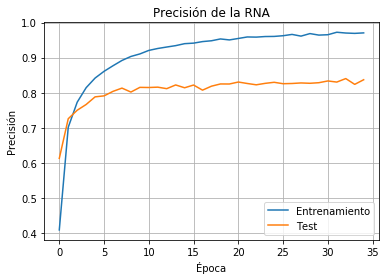

In [247]:
accuracyval1 = historial.history['val_accuracy']
accuracy1 = historial.history['accuracy']
pp.plot(historial.history['accuracy'])
pp.plot(historial.history['val_accuracy'])
pp.title('Precisión de la RNA')
pp.ylabel('Precisión')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='lower right')
pp.grid(True)
pp.savefig("images/model1/accuracy.png")
pp.show()


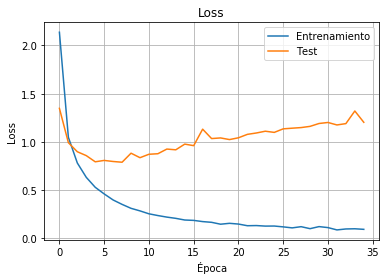

In [248]:
loss1 = historial.history['loss']
lossval1 = historial.history['val_loss']
pp.plot(historial.history['loss'])
pp.plot(historial.history['val_loss'])
pp.title('Loss')
pp.ylabel('Loss')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='upper right')
pp.grid(True)
pp.savefig("images/model1/loss.png")
pp.show() 


In [249]:
model.save_weights("saved_networks/model_1.h5")
print("Saved model to disk")

Saved model to disk


In [250]:
y_pred_resp1 = encoder.fit_transform( np.array(pred1).reshape(-1,1)).toarray()

In [251]:
y_pred_resp1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [252]:
matrix1 = confusion_matrix(y_test.argmax(axis=1), y_pred_resp1.argmax(axis=1))

In [253]:
matrix1

array([[307,   0,   0, ...,   0,   0,   0],
       [  0, 310,   6, ...,   0,   3,   0],
       [  0,   2, 316, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ..., 328,   2,   0],
       [  0,  20,   0, ...,   4, 292,   0],
       [  3,   0,   0, ...,   0,   3, 320]], dtype=int64)

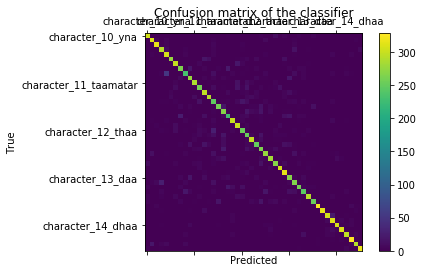

In [254]:
cm = matrix1
fig = pp.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pp.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + carpetas)
ax.set_yticklabels([''] + carpetas)
pp.xlabel('Predicted')
pp.ylabel('True')
pp.show()

# Segundo modelo

In [255]:
model = Sequential()
model.add(Dense(1024, input_dim = 1024, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))#Salidas

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # Precisión
historial = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64)

Train on 62560 samples, validate on 15640 samples
Epoch 1/5
62560/62560 [==============================] - 18s 282us/step - loss: 1.3497 - accuracy: 0.6321 - val_loss: 0.7218 - val_accuracy: 0.7954
Epoch 2/5
62560/62560 [==============================] - 18s 285us/step - loss: 0.5441 - accuracy: 0.8448 - val_loss: 0.5947 - val_accuracy: 0.8319
Epoch 3/5
62560/62560 [==============================] - 18s 282us/step - loss: 0.3781 - accuracy: 0.8898 - val_loss: 0.5327 - val_accuracy: 0.8495
Epoch 4/5
62560/62560 [==============================] - 18s 291us/step - loss: 0.2879 - accuracy: 0.9130 - val_loss: 0.4834 - val_accuracy: 0.8682
Epoch 5/5
62560/62560 [==============================] - 18s 283us/step - loss: 0.2331 - accuracy: 0.9281 - val_loss: 0.4730 - val_accuracy: 0.8770


In [256]:
y_pred2 = model.predict(x_test)

pred2 = list()
for i in range(len(y_pred2)):
    pred2.append(np.argmax(y_pred2[i]))
    
test2 = list()
for i in range(len(y_test)):
    test2.append(np.argmax(y_test[i]))
    
    
precision2 = accuracy_score(pred2, test2) # Comparamos lo que predijo la red con las salidas deseadas
print('Precisión: ',(precision2*100))

Precisión:  87.70460358056266


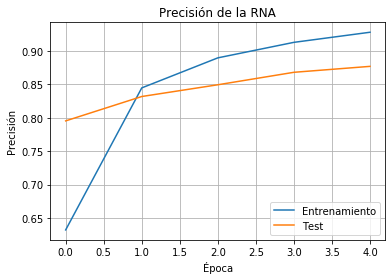

In [257]:
accuracy2 = historial.history['accuracy']
accuracyval2 = historial.history['val_accuracy']
pp.plot(historial.history['accuracy'])
pp.plot(historial.history['val_accuracy'])
pp.title('Precisión de la RNA')
pp.ylabel('Precisión')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='lower right')
pp.grid(True)
pp.savefig("images/model2/accuracy.png")
pp.show()


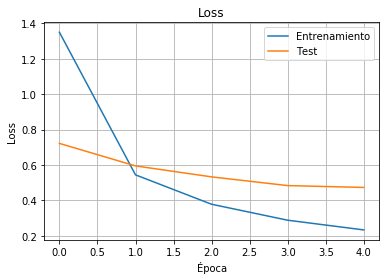

In [258]:
loss2 = historial.history['loss']
lossval2 = historial.history['val_loss']
pp.plot(historial.history['loss'])
pp.plot(historial.history['val_loss'])
pp.title('Loss')
pp.ylabel('Loss')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='upper right')
pp.grid(True)
pp.savefig("images/model2/loss.png")
pp.show()


In [259]:
model.save_weights("saved_networks/model_2.h5")
print("Saved model to disk")

Saved model to disk


In [260]:
y_pred_resp2 = encoder.fit_transform( np.array(pred2).reshape(-1,1)).toarray()

In [261]:
matrix2 = confusion_matrix(y_test.argmax(axis=1), y_pred_resp2.argmax(axis=1))

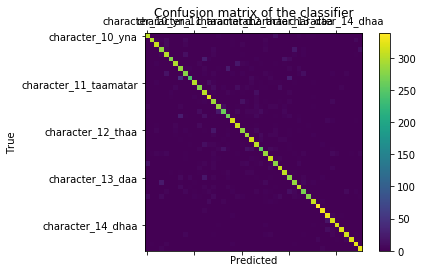

In [262]:
cm = matrix2
fig = pp.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pp.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + carpetas)
ax.set_yticklabels([''] + carpetas)
pp.xlabel('Predicted')
pp.ylabel('True')
pp.show()

# Tercer Modelo

In [263]:
model = Sequential()
model.add(Dense(1024, input_dim = 1024, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))#Salidas

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # Precisión
historial = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 12, batch_size = 64)

Train on 62560 samples, validate on 15640 samples
Epoch 1/12
62560/62560 [==============================] - 19s 306us/step - loss: 1.5613 - accuracy: 0.5755 - val_loss: 0.8548 - val_accuracy: 0.7609
Epoch 2/12
62560/62560 [==============================] - 18s 288us/step - loss: 0.6521 - accuracy: 0.8124 - val_loss: 0.6263 - val_accuracy: 0.8190
Epoch 3/12
62560/62560 [==============================] - 18s 289us/step - loss: 0.4451 - accuracy: 0.8700 - val_loss: 0.5778 - val_accuracy: 0.8368
Epoch 4/12
62560/62560 [==============================] - 18s 288us/step - loss: 0.3433 - accuracy: 0.8972 - val_loss: 0.5148 - val_accuracy: 0.8593
Epoch 5/12
62560/62560 [==============================] - 18s 288us/step - loss: 0.2769 - accuracy: 0.9153 - val_loss: 0.5578 - val_accuracy: 0.8533
Epoch 6/12
62560/62560 [==============================] - 18s 291us/step - loss: 0.2364 - accuracy: 0.9271 - val_loss: 0.5265 - val_accuracy: 0.8656
Epoch 7/12
62560/62560 [==============================] 

In [264]:
y_pred3 = model.predict(x_test)

pred3 = list()
for i in range(len(y_pred3)):
    pred3.append(np.argmax(y_pred3[i]))
    
test3 = list()
for i in range(len(y_test)):
    test3.append(np.argmax(y_test[i]))
    
    
precision3 = accuracy_score(pred3, test3) # Comparamos lo que predijo la red con las salidas deseadas
print('Precisión: ',(precision3*100))

Precisión:  87.74936061381075


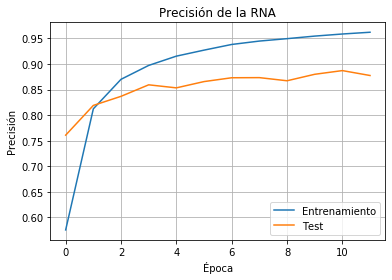

In [265]:
accuracy3 = historial.history['accuracy']
accuracyval3 = historial.history['val_accuracy']
pp.plot(historial.history['accuracy'])
pp.plot(historial.history['val_accuracy'])
pp.title('Precisión de la RNA')
pp.ylabel('Precisión')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='lower right')
pp.grid(True)
pp.savefig("images/model3/accuracy.png")
pp.show()


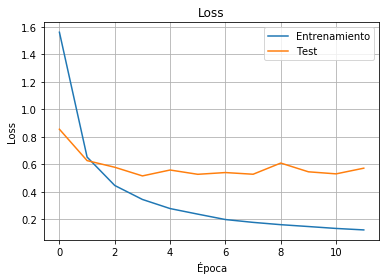

In [266]:
loss3 = historial.history['loss']
lossval3 = historial.history['val_loss']
pp.plot(historial.history['loss'])
pp.plot(historial.history['val_loss'])
pp.title('Loss')
pp.ylabel('Loss')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='upper right')
pp.grid(True)
pp.savefig("images/model3/loss.png")
pp.show()


In [267]:
model.save_weights("saved_networks/model_3.h5")
print("Saved model to disk")

Saved model to disk


In [268]:
y_pred_resp3 = encoder.fit_transform( np.array(pred3).reshape(-1,1)).toarray()

In [269]:
matrix3 = confusion_matrix(y_test.argmax(axis=1), y_pred_resp3.argmax(axis=1))

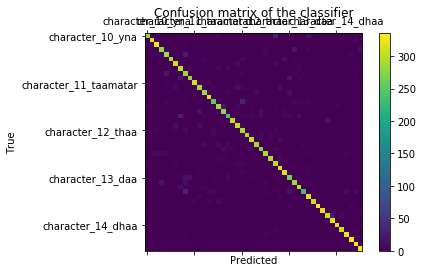

In [270]:
cm = matrix3
fig = pp.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pp.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + carpetas)
ax.set_yticklabels([''] + carpetas)
pp.xlabel('Predicted')
pp.ylabel('True')
pp.show()

# Generacion de grafica para reporte

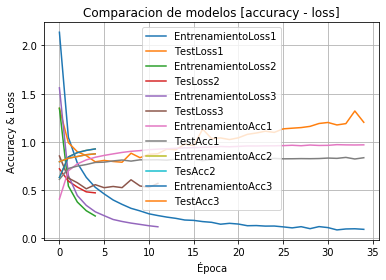

In [280]:
pp.plot(loss1)
pp.plot(lossval1)
pp.plot(loss2)
pp.plot(lossval2)
pp.plot(loss3)
pp.plot(lossval3)
pp.plot(accuracy1)
pp.plot(accuracyval1)
pp.plot(accuracy2)
pp.plot(accuracyval2)
pp.plot(accuracy2)
pp.plot(accuracyval2)
pp.title('Comparacion de modelos [accuracy - loss]')
pp.ylabel('Accuracy & Loss')
pp.xlabel('Época')
pp.legend(['EntrenamientoLoss1','TestLoss1','EntrenamientoLoss2','TesLoss2','EntrenamientoLoss3','TestLoss3',\
          'EntrenamientoAcc1','TestAcc1','EntrenamientoAcc2','TesAcc2','EntrenamientoAcc3','TestAcc3'], loc='upper center')
pp.grid(True)
pp.savefig("images/comparacion.png")
pp.show()

# Generacion de reporte

In [281]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.platypus import (SimpleDocTemplate, Paragraph, PageBreak)

In [282]:
w, h = A4
c = canvas.Canvas("reports/reporte.pdf", pagesize=A4)

t_images= 250

text = c.beginText(200,h - 25)
text.setFont('Times-Bold',17)
text.textLines('Proyecto Interciclo IA II')
c.drawText(text)

text = c.beginText(80,h - 60)
text.setFont('Times-Roman',12)
text.textLines('Hernan Leon, Oscar Pizarro')
c.drawText(text)

text = c.beginText(15,h - 60)
text.setFont('Times-Bold',12)
text.textLines('Integrantes: ')
c.drawText(text)

text = c.beginText(15,h - 80)
text.setFont('Times-Bold',12)
text.textLines('Fecha: ')
c.drawText(text)


text = c.beginText(55,h - 80)
text.setFont('Times-Roman',12)
text.textLines('14-06-2020')
c.drawText(text)



text = c.beginText(230,h - 130)
text.setFont('Times-Bold',15)
text.textLines('Reporte de Resultados')
c.drawText(text)

###Titulo Grafica Acuracy losss de los modelos
cadena = "Graficas de Accuracy y Loss de los modelos"
text = c.beginText(180, h-160)
text.setFont("Helvetica-Bold", 14)
text.textLines(cadena)
c.drawText(text)
##Accurracy modelo 1
cadena = "Graficas de Accuracy - Modelo1"
text = c.beginText(90, h-190)
text.setFont("Helvetica-Bold", 12)
text.textLines(cadena)
c.drawText(text)
c.drawImage("images/model1/accuracy.png", 50,400, width=t_images, height=t_images)

##Accurracy modelo 2
cadena = "Graficas de Accuracy - Modelo2"
text = c.beginText(90, h-450)
text.setFont("Helvetica-Bold", 12)
text.textLines(cadena)
c.drawText(text)
c.drawImage("images/model2/accuracy.png", 50,140, width=t_images, height=t_images)

##Loss modelo 1
cadena = "Graficas de Loss - Modelo1"
text = c.beginText(350, h-190)
text.setFont("Helvetica-Bold", 12)
text.textLines(cadena)
c.drawText(text)
c.drawImage("images/model1/loss.png", 300, 400, width= t_images, height= t_images)

##Loss modelo 2
cadena = "Graficas de Loss - Modelo2"
text = c.beginText(350, h-450)
text.setFont("Helvetica-Bold", 12)
text.textLines(cadena)
c.drawText(text)
c.drawImage("images/model2/loss.png", 300, 140, width= t_images, height= t_images)
#c.drawImage("images/model2/loss.png", 50, h - 200, width= t_images, height= t_images)
#c.drawImage("images/model3/accuracy.png", 50, h - 200, width= t_images, height= t_images)
#c.drawImage("images/model3/loss.png", 50, h - 200, width= t_images, height= t_images)

#canvas.drawString(50, h - 50, "¡Hola, mundo!")
c.showPage()#termina la primera pagina

###Titulo Grafica Acuracy losss de los modelos
cadena = "Graficas de Accuracy y Loss de los modelos"
text = c.beginText(180, h-160)
text.setFont("Helvetica-Bold", 14)
text.textLines(cadena)
c.drawText(text)

##Accurracy modelo 3
cadena = "Graficas de Accuracy - Modelo3"
text = c.beginText(90, h-190)
text.setFont("Helvetica-Bold", 12)
text.textLines(cadena)
c.drawText(text)
c.drawImage("images/model3/accuracy.png", 50,400, width=t_images, height=t_images)

##Loss modelo 3
cadena = "Graficas de Loss - Modelo3"
text = c.beginText(350, h-190)
text.setFont("Helvetica-Bold", 12)
text.textLines(cadena)
c.drawText(text)
c.drawImage("images/model3/loss.png", 300, 400, width= t_images, height= t_images)


###Titulo Grafica Acuracy losss de los modelos
cadena = "Grafica de comparacion\n   Accurracy & Loss"
text = c.beginText(180, h-480)
text.setFont("Courier-Bold", 16)
text.textLines(cadena)
c.drawText(text)


##Grafica comparacion
c.drawImage("images/comparacion.png", 100, 40, width= 400, height= 300)



c.showPage()
c.save()